# Путь

Discrete wavelet transform

In [3]:
pip install pywavelets matplotlib pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 48.4 MB/s eta 0:00:00


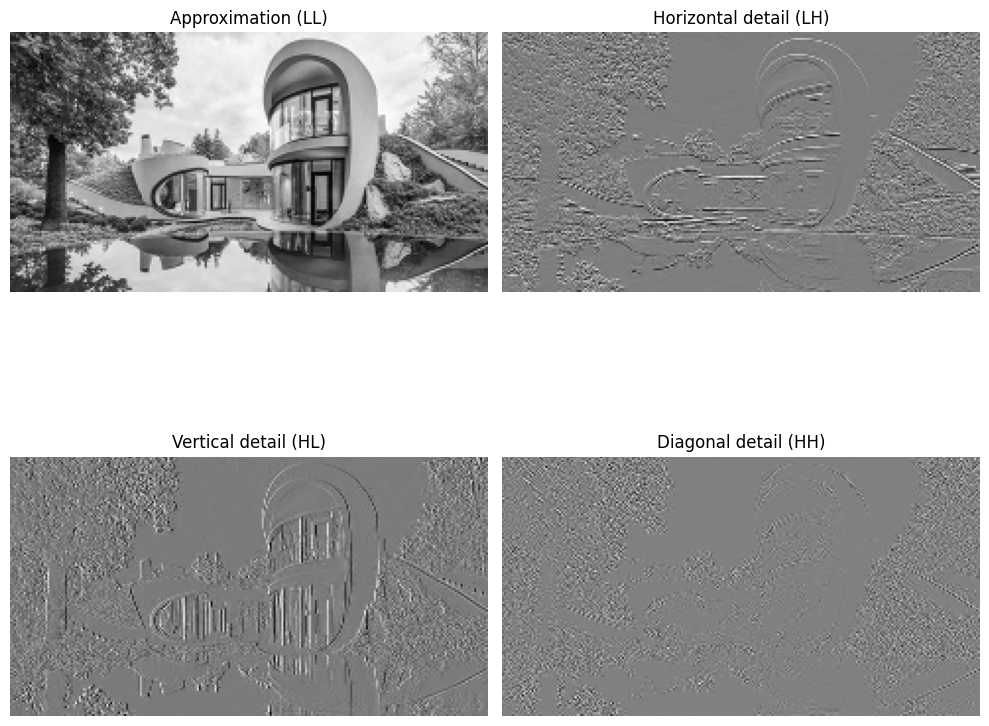

In [5]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("0.jpg").convert('L')
img_array = np.array(img)

wavelet = 'db1'  # 'haar', 'db2', 'bior1.3' и др.
coeffs2 = pywt.dwt2(img_array, wavelet)
LL, (LH, HL, HH) = coeffs2

titles = ['Approximation (LL)', 'Horizontal detail (LH)',
          'Vertical detail (HL)', 'Diagonal detail (HH)']
components = [LL, LH, HL, HH]

plt.figure(figsize=(10, 10))
for i, comp in enumerate(components):
    plt.subplot(2, 2, i + 1)
    plt.imshow(comp, cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

Аугментация - расширение датасета с помощью поворотов на 90/180 градусов

In [ ]:
# Свертки

class CustomCNN(nn.Module):
    def __init__(self, c=8, N=100):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, c, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(c, N * 2, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(c * 2, N * 4, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(c * 4, N * 8, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(N * 4 * 4 * 4, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, self.N)
        x = self.fc1(x)
        return x

# Модели

In [ ]:
import urllib.request
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision.transforms import functional as TF
import torch.nn.init as init
import random
import numpy as np

In [ ]:
url = "https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz"
urllib.request.urlretrieve(url, "cifar-100-python.tar.gz")

('cifar-100-python.tar.gz', <http.client.HTTPMessage at 0x7cb5a7fe3e50>)

In [ ]:
!tar -xvzf cifar-100-python.tar.gz

cifar-100-python/
cifar-100-python/file.txt~
cifar-100-python/train
cifar-100-python/test
cifar-100-python/meta


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = datasets.CIFAR100(root='/content', train=True, download=False, transform=transform)
test_dataset = datasets.CIFAR100(root='/content', train=False, download=False, transform=transform)

In [ ]:
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
class CNN1k(nn.Module):
    def __init__(self):
        super(CNN1k, self).__init__()
        self.fc1 = nn.Linear(8, 100)
        self.conv1 = nn.Conv2d(3, 2, 3, padding='same')
        self.bn1 = nn.BatchNorm2d(2)
        self.pool = nn.MaxPool2d(2, 2)
        self._initialize_weights()

    def forward(self, x):
        x = self.pool(self.pool(self.pool(self.pool(F.relu(self.bn1(self.conv1(x)))))))
        x = x.view(-1, 8)
        x = self.fc1(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                init.xavier_normal_(m.weight)
                init.constant_(m.bias, 0)


class CNN5k(nn.Module):
    def __init__(self):
        super(CNN5k, self).__init__()
        self.fc1 = nn.Linear(3 * 16, 100)
        self.conv1 = nn.Conv2d(3, 3, 3, padding='same')
        self.bn1 = nn.BatchNorm2d(3)
        self.pool = nn.MaxPool2d(2, 2)
        self._initialize_weights()

    def forward(self, x):
        x = self.pool(self.pool(self.pool(F.relu(self.bn1(self.conv1(x)+x)))))
        x = x.view(-1, 3 * 16)
        x = self.fc1(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                init.xavier_normal_(m.weight)
                init.constant_(m.bias, 0)


class CNN10k(nn.Module):
    def __init__(self):
        super(CNN10k, self).__init__()
        self.fc1 = nn.Linear(6 * 16, 100)
        self.conv1 = nn.Conv2d(3, 3, 3, padding='same')
        self.conv2 = nn.Conv2d(3, 6, 3, padding='same')
        self.bn1 = nn.BatchNorm2d(3)
        self.bn2 = nn.BatchNorm2d(6)
        self.pool = nn.MaxPool2d(2, 2)
        self._initialize_weights()

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x)+x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(x)
        x = x.view(-1, 6 * 16)
        x = self.fc1(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                init.xavier_normal_(m.weight)
                init.constant_(m.bias, 0)


class CNN50k(nn.Module):
    def __init__(self):
        super(CNN50k, self).__init__()
        self.fc1 = nn.Linear(25 * 16, 100)
        self.conv1 = nn.Conv2d(3, 4, 3, padding='same')
        self.conv2 = nn.Conv2d(4, 8, 3, padding='same')
        self.conv2_ = nn.Conv2d(8, 8, 3, padding='same')
        self.conv3 = nn.Conv2d(8, 16, 3, padding='same')
        self.conv3_ = nn.Conv2d(16, 16, 3, padding='same')
        self.conv4 = nn.Conv2d(16, 25, 3, padding='same')
        self.bn1 = nn.BatchNorm2d(4)
        self.bn2 = nn.BatchNorm2d(8)
        self.bn2_ = nn.BatchNorm2d(8)
        self.bn3 = nn.BatchNorm2d(16)
        self.bn3_ = nn.BatchNorm2d(16)
        self.bn4 = nn.BatchNorm2d(25)
        self.pool = nn.MaxPool2d(2, 2)
        self.downsample1 = nn.Sequential(nn.Conv2d(4, 8, kernel_size=1, stride=2), nn.BatchNorm2d(8))
        self.downsample2 = nn.Sequential(nn.Conv2d(8, 16, kernel_size=1, stride=1), nn.BatchNorm2d(16))
        self._initialize_weights()

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        i = x
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = F.relu(self.bn2_(self.conv2_(x))+self.downsample1(i))
        i = x
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn3_(self.conv3_(x))+self.downsample2(i))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool(x)
        x = x.view(-1, 25 * 16)
        x = self.fc1(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                init.xavier_normal_(m.weight)
                init.constant_(m.bias, 0)


class CNN100k(nn.Module):
    def __init__(self):
        super(CNN100k, self).__init__()
        self.fc1 = nn.Linear(38 * 16, 100)
        self.fc2 = nn.Linear(100, 100)
        self.conv1 = nn.Conv2d(3, 8, 3, padding='same')
        self.conv2 = nn.Conv2d(8, 16, 3, padding='same')
        self.conv2_ = nn.Conv2d(16, 16, 3, padding='same')
        self.conv3 = nn.Conv2d(16, 30, 3, padding='same')
        self.conv3_ = nn.Conv2d(30, 30, 3, padding='same')
        self.conv4 = nn.Conv2d(30, 38, 3, padding='same')
        self.bn1 = nn.BatchNorm2d(8)
        self.bn2 = nn.BatchNorm2d(16)
        self.bn2_ = nn.BatchNorm2d(16)
        self.bn3 = nn.BatchNorm2d(30)
        self.bn3_ = nn.BatchNorm2d(30)
        self.bn4 = nn.BatchNorm2d(38)
        self.pool = nn.MaxPool2d(2, 2)
        self.downsample1 = nn.Sequential(nn.Conv2d(8, 16, kernel_size=1, stride=1), nn.BatchNorm2d(16))
        self.downsample2 = nn.Sequential(nn.Conv2d(16, 30, kernel_size=1, stride=1), nn.BatchNorm2d(30))
        self._initialize_weights()

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        i = x
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn2_(self.conv2_(x))+self.downsample1(i))
        x = self.pool(x)
        i = x
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn3_(self.conv3_(x))+self.downsample2(i))
        x = self.pool(x)
        i = x
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool(x)
        x = x.view(-1, 38 * 16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                init.xavier_normal_(m.weight)
                init.constant_(m.bias, 0)


class CNN500k(nn.Module):
    def __init__(self):
        super(CNN500k, self).__init__()
        self.fc1 = nn.Linear(123 * 16, 100)
        self.fc2 = nn.Linear(100, 100)

        self.conv1 = nn.Conv2d(3, 8, 3, padding='same')
        self.conv2 = nn.Conv2d(8, 16, 3, padding='same')
        self.conv2_ = nn.Conv2d(16, 16, 3, padding='same')
        self.conv3 = nn.Conv2d(16, 32, 3, padding='same')
        self.conv3_ = nn.Conv2d(32, 32, 3, padding='same')
        self.conv4 = nn.Conv2d(32, 64, 3, padding='same')
        self.conv4_ = nn.Conv2d(64, 64, 3, padding='same')
        self.conv5 = nn.Conv2d(64, 123, 3, padding='same')
        self.conv5_ = nn.Conv2d(123, 123, 3, padding='same')

        self.bn1 = nn.BatchNorm2d(8)
        self.bn2 = nn.BatchNorm2d(16)
        self.bn2_ = nn.BatchNorm2d(16)
        self.bn3 = nn.BatchNorm2d(32)
        self.bn3_ = nn.BatchNorm2d(32)
        self.bn4 = nn.BatchNorm2d(64)
        self.bn4_ = nn.BatchNorm2d(64)
        self.bn5 = nn.BatchNorm2d(123)
        self.bn5_ = nn.BatchNorm2d(123)

        self.dropout1 = nn.Dropout2d(p=0.1)

        self.pool = nn.MaxPool2d(2, 2)

        self.downsample1 = nn.Sequential(nn.Conv2d(8, 16, kernel_size=1, stride=1), nn.BatchNorm2d(16))
        self.downsample2 = nn.Sequential(nn.Conv2d(16, 32, kernel_size=1, stride=1), nn.BatchNorm2d(32))
        self.downsample3 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=1, stride=1), nn.BatchNorm2d(64))
        self.downsample4 = nn.Sequential(nn.Conv2d(64, 123, kernel_size=1, stride=1), nn.BatchNorm2d(123))
        self._initialize_weights()

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        i = x
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn2_(self.conv2_(x))+self.downsample1(i))
        x = self.pool(x)
        i = x
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn3_(self.conv3_(x))+self.downsample2(i))
        x = self.pool(x)
        i = x
        x = F.relu(self.bn4(self.conv4(x)))
        x = F.relu(self.bn4_(self.conv4_(x))+self.downsample3(i))
        x = self.pool(x)
        i = x
        x = F.relu(self.bn5(self.conv5(x)))
        x = F.relu(self.bn5_(self.conv5_(x))+self.downsample4(i))
        x = self.dropout1(x)
        x = x.view(-1, 123 * 16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                init.xavier_normal_(m.weight)
                init.constant_(m.bias, 0)

class CNN1000k(nn.Module):
    def __init__(self):
        super(CNN1000k, self).__init__()
        self.fc1 = nn.Linear(128 * 16, 318)
        self.fc2 = nn.Linear(318, 100)
        self.fc3 = nn.Linear(100, 100)

        self.conv1 = nn.Conv2d(3, 8, 3, padding='same')
        self.conv2 = nn.Conv2d(8, 16, 3, padding='same')
        self.conv2_ = nn.Conv2d(16, 16, 3, padding='same')
        self.conv3 = nn.Conv2d(16, 32, 3, padding='same')
        self.conv3_ = nn.Conv2d(32, 32, 3, padding='same')
        self.conv4 = nn.Conv2d(32, 64, 3, padding='same')
        self.conv4_ = nn.Conv2d(64, 64, 3, padding='same')
        self.conv5 = nn.Conv2d(64, 128, 3, padding='same')
        self.conv5_ = nn.Conv2d(128, 128, 3, padding='same')
        # self.conv6 = nn.Conv2d(128, 158, 3, padding='same')
        # self.conv6_ = nn.Conv2d(158, 158, 3, padding='same')

        self.bn1 = nn.BatchNorm2d(8)
        self.bn2 = nn.BatchNorm2d(16)
        self.bn2_ = nn.BatchNorm2d(16)
        self.bn3 = nn.BatchNorm2d(32)
        self.bn3_ = nn.BatchNorm2d(32)
        self.bn4 = nn.BatchNorm2d(64)
        self.bn4_ = nn.BatchNorm2d(64)
        self.bn5 = nn.BatchNorm2d(128)
        self.bn5_ = nn.BatchNorm2d(128)
        # self.bn6 = nn.BatchNorm2d(158)
        # self.bn6_ = nn.BatchNorm2d(158)

        self.dropout1 = nn.Dropout2d(p=0.1)
        # self.dropout2 = nn.Dropout2d(p=0.1)

        self.pool = nn.MaxPool2d(2, 2)

        self.downsample1 = nn.Sequential(nn.Conv2d(8, 16, kernel_size=1, stride=1), nn.BatchNorm2d(16))
        self.downsample2 = nn.Sequential(nn.Conv2d(16, 32, kernel_size=1, stride=1), nn.BatchNorm2d(32))
        self.downsample3 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=1, stride=1), nn.BatchNorm2d(64))
        self.downsample4 = nn.Sequential(nn.Conv2d(64, 128, kernel_size=1, stride=1), nn.BatchNorm2d(128))
        # self.downsample5 = nn.Sequential(nn.Conv2d(128, 158, kernel_size=1, stride=1), nn.BatchNorm2d(158))
        self._initialize_weights()

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        i = x
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn2_(self.conv2_(x))+self.downsample1(i))
        x = self.pool(x)
        i = x
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn3_(self.conv3_(x))+self.downsample2(i))
        x = self.pool(x)
        i = x
        x = F.relu(self.bn4(self.conv4(x)))
        x = F.relu(self.bn4_(self.conv4_(x))+self.downsample3(i))
        x = self.pool(x)
        i = x
        x = F.relu(self.bn5(self.conv5(x)))
        x = F.relu(self.bn5_(self.conv5_(x))+self.downsample4(i))
        x = self.dropout1(x)
        # i = x
        # x = F.relu(self.bn6(self.conv6(x)))
        # x = F.relu(self.bn6_(self.conv6_(x))+self.downsample5(i))
        # x = self.dropout2(x)
        x = x.view(-1, 128 * 16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                init.xavier_normal_(m.weight)
                init.constant_(m.bias, 0)

In [ ]:
# models = [CNN1k(), CNN5k(), CNN10k(), CNN50k(), CNN100k(), CNN500k(), CNN1000k()]
# param_counts = [sum(p.numel() for p in model.parameters()) for model in models]
accuracies = []
accuracies_train = []
# print(param_counts)

In [ ]:
import torch.optim as optim
from tqdm import tqdm

def train_model(model, trainloader, testloader, name, epochs=10, weight_decay=1e-4):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=weight_decay)
    best_accuracy = 0
    accuracie_train = 0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in tqdm(trainloader, desc=f"Training epoch {epoch+1}/{epochs}"):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        model.eval()
        correct0 = 0
        total0 = 0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total0 += labels.size(0)
                correct0 += (predicted == labels).sum().item()

        accuracy = 100 * correct0 / total0
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            accuracie_train = 100 * correct / total
            torch.save(model.state_dict(), f'model_{name}.pth')

        print(f"Epoch {epoch+1} Loss: {running_loss / len(trainloader)} Accuracy_train: {100 * correct / total}% Accuracy_test: {accuracy}%")
    print(f"Test Accuracy: {best_accuracy}%")
    return best_accuracy, accuracie_train

In [ ]:
model = CNN1k()
print(model)
model = model.to(device)
accuracy, accuracie_train = train_model(model, train_loader, test_loader, "1k", epochs=40)
accuracies.append(accuracy)
accuracies_train.append(accuracie_train)

CNN1k(
  (fc1): Linear(in_features=8, out_features=100, bias=True)
  (conv1): Conv2d(3, 2, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn1): BatchNorm2d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


Training epoch 1/40: 100%|██████████| 3125/3125 [00:18<00:00, 167.46it/s]


Epoch 1 Loss: 4.478119641723633 Accuracy_train: 2.266% Accuracy_test: 3.39%


Training epoch 2/40: 100%|██████████| 3125/3125 [00:19<00:00, 162.09it/s]


Epoch 2 Loss: 4.326428974838257 Accuracy_train: 3.844% Accuracy_test: 4.62%


Training epoch 3/40: 100%|██████████| 3125/3125 [00:19<00:00, 162.03it/s]


Epoch 3 Loss: 4.275151037979126 Accuracy_train: 4.728% Accuracy_test: 5.76%


Training epoch 4/40: 100%|██████████| 3125/3125 [00:18<00:00, 167.97it/s]


Epoch 4 Loss: 4.237185643157959 Accuracy_train: 5.104% Accuracy_test: 6.29%


Training epoch 5/40: 100%|██████████| 3125/3125 [00:18<00:00, 167.40it/s]


Epoch 5 Loss: 4.2222740003967285 Accuracy_train: 5.396% Accuracy_test: 5.72%


Training epoch 6/40: 100%|██████████| 3125/3125 [00:19<00:00, 161.42it/s]


Epoch 6 Loss: 4.2052093977355955 Accuracy_train: 5.784% Accuracy_test: 6.39%


Training epoch 7/40: 100%|██████████| 3125/3125 [00:18<00:00, 165.54it/s]


Epoch 7 Loss: 4.194364045944214 Accuracy_train: 5.976% Accuracy_test: 6.3%


Training epoch 8/40: 100%|██████████| 3125/3125 [00:18<00:00, 169.20it/s]


Epoch 8 Loss: 4.185997487945556 Accuracy_train: 6.09% Accuracy_test: 6.42%


Training epoch 9/40: 100%|██████████| 3125/3125 [00:18<00:00, 165.33it/s]


Epoch 9 Loss: 4.175550530319214 Accuracy_train: 6.27% Accuracy_test: 6.35%


Training epoch 10/40: 100%|██████████| 3125/3125 [00:19<00:00, 164.36it/s]


Epoch 10 Loss: 4.167952495422363 Accuracy_train: 6.438% Accuracy_test: 7.21%


Training epoch 11/40: 100%|██████████| 3125/3125 [00:18<00:00, 169.95it/s]


Epoch 11 Loss: 4.157774562683105 Accuracy_train: 6.476% Accuracy_test: 6.82%


Training epoch 12/40: 100%|██████████| 3125/3125 [00:18<00:00, 171.55it/s]


Epoch 12 Loss: 4.154193338699341 Accuracy_train: 6.436% Accuracy_test: 7.15%


Training epoch 13/40: 100%|██████████| 3125/3125 [00:18<00:00, 168.67it/s]


Epoch 13 Loss: 4.143325187149048 Accuracy_train: 6.606% Accuracy_test: 7.32%


Training epoch 14/40: 100%|██████████| 3125/3125 [00:17<00:00, 174.80it/s]


Epoch 14 Loss: 4.13197766204834 Accuracy_train: 6.918% Accuracy_test: 7.52%


Training epoch 15/40: 100%|██████████| 3125/3125 [00:17<00:00, 174.82it/s]


Epoch 15 Loss: 4.119797894439698 Accuracy_train: 6.922% Accuracy_test: 7.64%


Training epoch 16/40: 100%|██████████| 3125/3125 [00:18<00:00, 168.53it/s]


Epoch 16 Loss: 4.109594167556763 Accuracy_train: 7.054% Accuracy_test: 7.56%


Training epoch 17/40: 100%|██████████| 3125/3125 [00:19<00:00, 160.87it/s]


Epoch 17 Loss: 4.094630032348633 Accuracy_train: 7.384% Accuracy_test: 7.35%


Training epoch 18/40: 100%|██████████| 3125/3125 [00:17<00:00, 174.39it/s]


Epoch 18 Loss: 4.083737527160644 Accuracy_train: 7.366% Accuracy_test: 7.58%


Training epoch 19/40: 100%|██████████| 3125/3125 [00:18<00:00, 166.75it/s]


Epoch 19 Loss: 4.074275841827393 Accuracy_train: 7.63% Accuracy_test: 8.01%


Training epoch 20/40: 100%|██████████| 3125/3125 [00:18<00:00, 172.91it/s]


Epoch 20 Loss: 4.065280955429077 Accuracy_train: 7.568% Accuracy_test: 8.13%


Training epoch 21/40: 100%|██████████| 3125/3125 [00:17<00:00, 173.66it/s]


Epoch 21 Loss: 4.061227292480469 Accuracy_train: 7.776% Accuracy_test: 8.2%


Training epoch 22/40: 100%|██████████| 3125/3125 [00:18<00:00, 167.98it/s]


Epoch 22 Loss: 4.051266950149536 Accuracy_train: 7.922% Accuracy_test: 8.13%


Training epoch 23/40: 100%|██████████| 3125/3125 [00:17<00:00, 174.40it/s]


Epoch 23 Loss: 4.045569186096191 Accuracy_train: 7.83% Accuracy_test: 8.56%


Training epoch 24/40: 100%|██████████| 3125/3125 [00:17<00:00, 174.47it/s]


Epoch 24 Loss: 4.04109394065857 Accuracy_train: 7.966% Accuracy_test: 8.61%


Training epoch 25/40: 100%|██████████| 3125/3125 [00:18<00:00, 167.53it/s]


Epoch 25 Loss: 4.034817978210449 Accuracy_train: 8.264% Accuracy_test: 8.55%


Training epoch 26/40: 100%|██████████| 3125/3125 [00:18<00:00, 173.03it/s]


Epoch 26 Loss: 4.031535316238403 Accuracy_train: 8.19% Accuracy_test: 8.14%


Training epoch 27/40: 100%|██████████| 3125/3125 [00:17<00:00, 173.66it/s]


Epoch 27 Loss: 4.026730211410523 Accuracy_train: 8.372% Accuracy_test: 8.61%


Training epoch 28/40: 100%|██████████| 3125/3125 [00:18<00:00, 167.47it/s]


Epoch 28 Loss: 4.025767333755494 Accuracy_train: 8.162% Accuracy_test: 8.47%


Training epoch 29/40: 100%|██████████| 3125/3125 [00:17<00:00, 174.40it/s]


Epoch 29 Loss: 4.023288143234253 Accuracy_train: 8.428% Accuracy_test: 8.52%


Training epoch 30/40: 100%|██████████| 3125/3125 [00:18<00:00, 173.55it/s]


Epoch 30 Loss: 4.020661804428101 Accuracy_train: 8.358% Accuracy_test: 8.7%


Training epoch 31/40: 100%|██████████| 3125/3125 [00:18<00:00, 167.63it/s]


Epoch 31 Loss: 4.019702914276123 Accuracy_train: 8.412% Accuracy_test: 8.3%


Training epoch 32/40: 100%|██████████| 3125/3125 [00:18<00:00, 172.42it/s]


Epoch 32 Loss: 4.01707977394104 Accuracy_train: 8.33% Accuracy_test: 8.78%


Training epoch 33/40: 100%|██████████| 3125/3125 [00:18<00:00, 171.86it/s]


Epoch 33 Loss: 4.01393152015686 Accuracy_train: 8.402% Accuracy_test: 8.98%


Training epoch 34/40: 100%|██████████| 3125/3125 [00:18<00:00, 167.39it/s]


Epoch 34 Loss: 4.0159205442810055 Accuracy_train: 8.626% Accuracy_test: 8.91%


Training epoch 35/40: 100%|██████████| 3125/3125 [00:17<00:00, 176.70it/s]


Epoch 35 Loss: 4.017138667984009 Accuracy_train: 8.32% Accuracy_test: 8.88%


Training epoch 36/40: 100%|██████████| 3125/3125 [00:17<00:00, 174.84it/s]


Epoch 36 Loss: 4.013859232025147 Accuracy_train: 8.654% Accuracy_test: 9.01%


Training epoch 37/40: 100%|██████████| 3125/3125 [00:18<00:00, 168.53it/s]


Epoch 37 Loss: 4.010731108245849 Accuracy_train: 8.542% Accuracy_test: 9.21%


Training epoch 38/40: 100%|██████████| 3125/3125 [00:17<00:00, 176.41it/s]


Epoch 38 Loss: 4.011964201965332 Accuracy_train: 8.684% Accuracy_test: 8.64%


Training epoch 39/40: 100%|██████████| 3125/3125 [00:18<00:00, 172.36it/s]


Epoch 39 Loss: 4.013541385726929 Accuracy_train: 8.564% Accuracy_test: 8.69%


Training epoch 40/40: 100%|██████████| 3125/3125 [00:19<00:00, 163.89it/s]


Epoch 40 Loss: 4.009028351821899 Accuracy_train: 8.534% Accuracy_test: 8.65%
Test Accuracy: 9.21%


In [ ]:
model = CNN5k()
print(model)
model = model.to(device)
accuracy, accuracie_train = train_model(model, train_loader, test_loader, "5k", epochs=40)
accuracies.append(accuracy)
accuracies_train.append(accuracie_train)

CNN5k(
  (fc1): Linear(in_features=48, out_features=100, bias=True)
  (conv1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


Training epoch 1/40: 100%|██████████| 3125/3125 [00:20<00:00, 154.78it/s]


Epoch 1 Loss: 4.166907724609375 Accuracy_train: 7.456% Accuracy_test: 11.74%


Training epoch 2/40: 100%|██████████| 3125/3125 [00:18<00:00, 164.86it/s]


Epoch 2 Loss: 3.7861874369049073 Accuracy_train: 12.676% Accuracy_test: 14.07%


Training epoch 3/40: 100%|██████████| 3125/3125 [00:20<00:00, 155.64it/s]


Epoch 3 Loss: 3.6761223719024656 Accuracy_train: 14.788% Accuracy_test: 15.52%


Training epoch 4/40: 100%|██████████| 3125/3125 [00:19<00:00, 157.99it/s]


Epoch 4 Loss: 3.6178295892333985 Accuracy_train: 15.89% Accuracy_test: 15.71%


Training epoch 5/40: 100%|██████████| 3125/3125 [00:19<00:00, 159.75it/s]


Epoch 5 Loss: 3.5829985104370117 Accuracy_train: 16.642% Accuracy_test: 16.65%


Training epoch 6/40: 100%|██████████| 3125/3125 [00:18<00:00, 165.76it/s]


Epoch 6 Loss: 3.5589569550323485 Accuracy_train: 17.14% Accuracy_test: 16.55%


Training epoch 7/40: 100%|██████████| 3125/3125 [00:18<00:00, 165.08it/s]


Epoch 7 Loss: 3.536637434768677 Accuracy_train: 17.678% Accuracy_test: 16.73%


Training epoch 8/40: 100%|██████████| 3125/3125 [00:19<00:00, 160.14it/s]


Epoch 8 Loss: 3.524719970626831 Accuracy_train: 17.872% Accuracy_test: 17.65%


Training epoch 9/40: 100%|██████████| 3125/3125 [00:19<00:00, 159.63it/s]


Epoch 9 Loss: 3.5134822624969484 Accuracy_train: 18.12% Accuracy_test: 17.15%


Training epoch 10/40: 100%|██████████| 3125/3125 [00:18<00:00, 165.74it/s]


Epoch 10 Loss: 3.5048321324157716 Accuracy_train: 18.318% Accuracy_test: 17.04%


Training epoch 11/40: 100%|██████████| 3125/3125 [00:18<00:00, 165.26it/s]


Epoch 11 Loss: 3.4959231865692137 Accuracy_train: 18.432% Accuracy_test: 17.95%


Training epoch 12/40: 100%|██████████| 3125/3125 [00:19<00:00, 159.26it/s]


Epoch 12 Loss: 3.4856208140563965 Accuracy_train: 18.61% Accuracy_test: 17.48%


Training epoch 13/40: 100%|██████████| 3125/3125 [00:19<00:00, 159.85it/s]


Epoch 13 Loss: 3.479286048965454 Accuracy_train: 18.698% Accuracy_test: 18.1%


Training epoch 14/40: 100%|██████████| 3125/3125 [00:18<00:00, 165.15it/s]


Epoch 14 Loss: 3.4718872821044924 Accuracy_train: 18.92% Accuracy_test: 17.9%


Training epoch 15/40: 100%|██████████| 3125/3125 [00:18<00:00, 165.51it/s]


Epoch 15 Loss: 3.46589740486145 Accuracy_train: 19.076% Accuracy_test: 17.76%


Training epoch 16/40: 100%|██████████| 3125/3125 [00:19<00:00, 160.14it/s]


Epoch 16 Loss: 3.4639977062225342 Accuracy_train: 18.838% Accuracy_test: 18.48%


Training epoch 17/40: 100%|██████████| 3125/3125 [00:19<00:00, 158.20it/s]


Epoch 17 Loss: 3.458347149963379 Accuracy_train: 19.098% Accuracy_test: 18.16%


Training epoch 18/40: 100%|██████████| 3125/3125 [00:19<00:00, 161.15it/s]


Epoch 18 Loss: 3.4539442433166503 Accuracy_train: 19.268% Accuracy_test: 18.69%


Training epoch 19/40: 100%|██████████| 3125/3125 [00:19<00:00, 163.34it/s]


Epoch 19 Loss: 3.4496565657806397 Accuracy_train: 19.41% Accuracy_test: 18.33%


Training epoch 20/40: 100%|██████████| 3125/3125 [00:20<00:00, 154.26it/s]


Epoch 20 Loss: 3.447638760986328 Accuracy_train: 19.284% Accuracy_test: 18.42%


Training epoch 21/40: 100%|██████████| 3125/3125 [00:21<00:00, 147.32it/s]


Epoch 21 Loss: 3.4463559711456297 Accuracy_train: 19.43% Accuracy_test: 18.51%


Training epoch 22/40: 100%|██████████| 3125/3125 [00:22<00:00, 140.53it/s]


Epoch 22 Loss: 3.4420969535827637 Accuracy_train: 19.398% Accuracy_test: 18.67%


Training epoch 23/40: 100%|██████████| 3125/3125 [00:22<00:00, 136.43it/s]


Epoch 23 Loss: 3.4371683111572264 Accuracy_train: 19.538% Accuracy_test: 18.51%


Training epoch 24/40: 100%|██████████| 3125/3125 [00:22<00:00, 136.45it/s]


Epoch 24 Loss: 3.4365694329071044 Accuracy_train: 19.31% Accuracy_test: 18.71%


Training epoch 25/40: 100%|██████████| 3125/3125 [00:22<00:00, 136.54it/s]


Epoch 25 Loss: 3.4396189833831787 Accuracy_train: 19.652% Accuracy_test: 18.88%


Training epoch 26/40: 100%|██████████| 3125/3125 [00:21<00:00, 142.77it/s]


Epoch 26 Loss: 3.4328170569610594 Accuracy_train: 19.79% Accuracy_test: 18.83%


Training epoch 27/40: 100%|██████████| 3125/3125 [00:21<00:00, 145.24it/s]


Epoch 27 Loss: 3.43456590385437 Accuracy_train: 19.522% Accuracy_test: 18.62%


Training epoch 28/40: 100%|██████████| 3125/3125 [00:20<00:00, 149.76it/s]


Epoch 28 Loss: 3.430147910232544 Accuracy_train: 19.644% Accuracy_test: 19.15%


Training epoch 29/40: 100%|██████████| 3125/3125 [00:21<00:00, 147.28it/s]


Epoch 29 Loss: 3.4285445476531984 Accuracy_train: 19.77% Accuracy_test: 19.08%


Training epoch 30/40: 100%|██████████| 3125/3125 [00:21<00:00, 147.51it/s]


Epoch 30 Loss: 3.428068747329712 Accuracy_train: 19.622% Accuracy_test: 18.51%


Training epoch 31/40: 100%|██████████| 3125/3125 [00:21<00:00, 142.52it/s]


Epoch 31 Loss: 3.425805695037842 Accuracy_train: 19.778% Accuracy_test: 18.8%


Training epoch 32/40: 100%|██████████| 3125/3125 [00:21<00:00, 143.02it/s]


Epoch 32 Loss: 3.424370988998413 Accuracy_train: 19.73% Accuracy_test: 18.64%


Training epoch 33/40: 100%|██████████| 3125/3125 [00:21<00:00, 143.93it/s]


Epoch 33 Loss: 3.424882819137573 Accuracy_train: 19.742% Accuracy_test: 19.2%


Training epoch 34/40: 100%|██████████| 3125/3125 [00:20<00:00, 151.33it/s]


Epoch 34 Loss: 3.4201159389495848 Accuracy_train: 19.804% Accuracy_test: 19.18%


Training epoch 35/40: 100%|██████████| 3125/3125 [00:20<00:00, 152.42it/s]


Epoch 35 Loss: 3.419692227554321 Accuracy_train: 19.732% Accuracy_test: 19.1%


Training epoch 36/40: 100%|██████████| 3125/3125 [00:20<00:00, 152.50it/s]


Epoch 36 Loss: 3.420025517501831 Accuracy_train: 19.934% Accuracy_test: 18.91%


Training epoch 37/40: 100%|██████████| 3125/3125 [00:21<00:00, 148.75it/s]


Epoch 37 Loss: 3.4194216637039183 Accuracy_train: 19.936% Accuracy_test: 19.29%


Training epoch 38/40: 100%|██████████| 3125/3125 [00:20<00:00, 149.33it/s]


Epoch 38 Loss: 3.4153915027618407 Accuracy_train: 19.716% Accuracy_test: 19.24%


Training epoch 39/40: 100%|██████████| 3125/3125 [00:21<00:00, 148.77it/s]


Epoch 39 Loss: 3.414855083465576 Accuracy_train: 20.026% Accuracy_test: 18.98%


Training epoch 40/40: 100%|██████████| 3125/3125 [00:20<00:00, 149.27it/s]


Epoch 40 Loss: 3.416972315788269 Accuracy_train: 19.872% Accuracy_test: 19.21%
Test Accuracy: 19.29%


In [ ]:
model = CNN10k()
print(model)
model = model.to(device)
accuracy, accuracie_train = train_model(model, train_loader, test_loader, "10k", epochs=40)
accuracies.append(accuracy)
accuracies_train.append(accuracie_train)

CNN10k(
  (fc1): Linear(in_features=96, out_features=100, bias=True)
  (conv1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


Training epoch 1/40: 100%|██████████| 3125/3125 [00:27<00:00, 115.66it/s]


Epoch 1 Loss: 4.110315511322021 Accuracy_train: 8.568% Accuracy_test: 14.66%


Training epoch 2/40: 100%|██████████| 3125/3125 [00:26<00:00, 118.20it/s]


Epoch 2 Loss: 3.576273592605591 Accuracy_train: 17.056% Accuracy_test: 18.65%


Training epoch 3/40: 100%|██████████| 3125/3125 [00:25<00:00, 120.25it/s]


Epoch 3 Loss: 3.4090668885803224 Accuracy_train: 20.356% Accuracy_test: 20.86%


Training epoch 4/40: 100%|██████████| 3125/3125 [00:26<00:00, 119.63it/s]


Epoch 4 Loss: 3.3273608333587648 Accuracy_train: 21.624% Accuracy_test: 22.12%


Training epoch 5/40: 100%|██████████| 3125/3125 [00:25<00:00, 120.33it/s]


Epoch 5 Loss: 3.276514143028259 Accuracy_train: 22.676% Accuracy_test: 22.06%


Training epoch 6/40: 100%|██████████| 3125/3125 [00:27<00:00, 115.49it/s]


Epoch 6 Loss: 3.242767762489319 Accuracy_train: 23.21% Accuracy_test: 22.93%


Training epoch 7/40: 100%|██████████| 3125/3125 [00:25<00:00, 121.53it/s]


Epoch 7 Loss: 3.217715729637146 Accuracy_train: 23.568% Accuracy_test: 23.15%


Training epoch 8/40: 100%|██████████| 3125/3125 [00:25<00:00, 121.01it/s]


Epoch 8 Loss: 3.1977951610946653 Accuracy_train: 24.144% Accuracy_test: 23.78%


Training epoch 9/40: 100%|██████████| 3125/3125 [00:25<00:00, 121.01it/s]


Epoch 9 Loss: 3.1862424655914308 Accuracy_train: 24.218% Accuracy_test: 23.86%


Training epoch 10/40: 100%|██████████| 3125/3125 [00:26<00:00, 119.61it/s]


Epoch 10 Loss: 3.1732959141921997 Accuracy_train: 24.658% Accuracy_test: 23.6%


Training epoch 11/40: 100%|██████████| 3125/3125 [00:26<00:00, 119.17it/s]


Epoch 11 Loss: 3.161356753692627 Accuracy_train: 24.952% Accuracy_test: 24.23%


Training epoch 12/40: 100%|██████████| 3125/3125 [00:26<00:00, 118.66it/s]


Epoch 12 Loss: 3.15195331577301 Accuracy_train: 24.94% Accuracy_test: 24.03%


Training epoch 13/40: 100%|██████████| 3125/3125 [00:26<00:00, 119.94it/s]


Epoch 13 Loss: 3.144651861190796 Accuracy_train: 24.988% Accuracy_test: 23.73%


Training epoch 14/40: 100%|██████████| 3125/3125 [00:26<00:00, 117.91it/s]


Epoch 14 Loss: 3.136698027191162 Accuracy_train: 25.4% Accuracy_test: 24.34%


Training epoch 15/40: 100%|██████████| 3125/3125 [00:26<00:00, 119.37it/s]


Epoch 15 Loss: 3.131676784362793 Accuracy_train: 25.336% Accuracy_test: 23.97%


Training epoch 16/40: 100%|██████████| 3125/3125 [00:26<00:00, 119.91it/s]


Epoch 16 Loss: 3.124035004196167 Accuracy_train: 25.696% Accuracy_test: 24.01%


Training epoch 17/40: 100%|██████████| 3125/3125 [00:26<00:00, 119.19it/s]


Epoch 17 Loss: 3.1159174489974975 Accuracy_train: 25.474% Accuracy_test: 24.22%


Training epoch 18/40: 100%|██████████| 3125/3125 [00:26<00:00, 119.78it/s]


Epoch 18 Loss: 3.114979581451416 Accuracy_train: 25.864% Accuracy_test: 24.35%


Training epoch 19/40: 100%|██████████| 3125/3125 [00:26<00:00, 119.37it/s]


Epoch 19 Loss: 3.1089538535690306 Accuracy_train: 25.662% Accuracy_test: 24.5%


Training epoch 20/40: 100%|██████████| 3125/3125 [00:26<00:00, 118.45it/s]


Epoch 20 Loss: 3.1052091264724733 Accuracy_train: 25.896% Accuracy_test: 25.03%


Training epoch 21/40: 100%|██████████| 3125/3125 [00:25<00:00, 120.82it/s]


Epoch 21 Loss: 3.1014771546936033 Accuracy_train: 26.078% Accuracy_test: 24.61%


Training epoch 22/40: 100%|██████████| 3125/3125 [00:26<00:00, 119.96it/s]


Epoch 22 Loss: 3.0966565043258667 Accuracy_train: 26.112% Accuracy_test: 24.57%


Training epoch 23/40: 100%|██████████| 3125/3125 [00:26<00:00, 115.83it/s]


Epoch 23 Loss: 3.0927576411437987 Accuracy_train: 26.152% Accuracy_test: 25.11%


Training epoch 24/40: 100%|██████████| 3125/3125 [00:26<00:00, 116.42it/s]


Epoch 24 Loss: 3.0950729016113283 Accuracy_train: 26.176% Accuracy_test: 24.05%


Training epoch 25/40: 100%|██████████| 3125/3125 [00:26<00:00, 116.58it/s]


Epoch 25 Loss: 3.085648257751465 Accuracy_train: 26.106% Accuracy_test: 24.89%


Training epoch 26/40: 100%|██████████| 3125/3125 [00:26<00:00, 118.78it/s]


Epoch 26 Loss: 3.0840692643737793 Accuracy_train: 26.404% Accuracy_test: 24.93%


Training epoch 27/40: 100%|██████████| 3125/3125 [00:27<00:00, 115.65it/s]


Epoch 27 Loss: 3.079677191848755 Accuracy_train: 26.284% Accuracy_test: 24.63%


Training epoch 28/40: 100%|██████████| 3125/3125 [00:27<00:00, 113.04it/s]


Epoch 28 Loss: 3.078316152496338 Accuracy_train: 26.4% Accuracy_test: 24.68%


Training epoch 29/40: 100%|██████████| 3125/3125 [00:27<00:00, 114.75it/s]


Epoch 29 Loss: 3.0729196775817873 Accuracy_train: 26.472% Accuracy_test: 24.73%


Training epoch 30/40: 100%|██████████| 3125/3125 [00:29<00:00, 107.40it/s]


Epoch 30 Loss: 3.0730705254364015 Accuracy_train: 26.5% Accuracy_test: 24.62%


Training epoch 31/40: 100%|██████████| 3125/3125 [00:27<00:00, 111.87it/s]


Epoch 31 Loss: 3.0724352125167846 Accuracy_train: 26.504% Accuracy_test: 24.74%


Training epoch 32/40: 100%|██████████| 3125/3125 [00:28<00:00, 109.00it/s]


Epoch 32 Loss: 3.0683184732818605 Accuracy_train: 26.64% Accuracy_test: 24.74%


Training epoch 33/40: 100%|██████████| 3125/3125 [00:27<00:00, 113.41it/s]


Epoch 33 Loss: 3.069671006202698 Accuracy_train: 26.55% Accuracy_test: 24.57%


Training epoch 34/40: 100%|██████████| 3125/3125 [00:27<00:00, 113.74it/s]


Epoch 34 Loss: 3.065331761474609 Accuracy_train: 26.992% Accuracy_test: 24.92%


Training epoch 35/40: 100%|██████████| 3125/3125 [00:27<00:00, 114.09it/s]


Epoch 35 Loss: 3.0626702042770386 Accuracy_train: 26.692% Accuracy_test: 25.25%


Training epoch 36/40: 100%|██████████| 3125/3125 [00:26<00:00, 119.71it/s]


Epoch 36 Loss: 3.0667472728347778 Accuracy_train: 26.732% Accuracy_test: 25.11%


Training epoch 37/40: 100%|██████████| 3125/3125 [00:25<00:00, 120.71it/s]


Epoch 37 Loss: 3.0634432999801637 Accuracy_train: 26.75% Accuracy_test: 25.03%


Training epoch 38/40: 100%|██████████| 3125/3125 [00:25<00:00, 120.23it/s]


Epoch 38 Loss: 3.0600150456237794 Accuracy_train: 26.774% Accuracy_test: 24.42%


Training epoch 39/40: 100%|██████████| 3125/3125 [00:26<00:00, 117.64it/s]


Epoch 39 Loss: 3.0610916018295287 Accuracy_train: 26.756% Accuracy_test: 25.55%


Training epoch 40/40: 100%|██████████| 3125/3125 [00:27<00:00, 112.78it/s]


Epoch 40 Loss: 3.0572421281814575 Accuracy_train: 26.788% Accuracy_test: 24.55%
Test Accuracy: 25.55%


In [ ]:
model = CNN50k()
print(model)
model = model.to(device)
accuracy, accuracie_train = train_model(model, train_loader, test_loader, "50k", epochs=40)
accuracies.append(accuracy)
accuracies_train.append(accuracie_train)

CNN50k(
  (fc1): Linear(in_features=400, out_features=100, bias=True)
  (conv1): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2_): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv3_): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv4): Conv2d(16, 25, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2_): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3_): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm2d(25, eps=1e-05, momen

Training epoch 1/40: 100%|██████████| 3125/3125 [00:57<00:00, 54.17it/s]


Epoch 1 Loss: 3.7928660618591308 Accuracy_train: 13.152% Accuracy_test: 21.3%


Training epoch 2/40: 100%|██████████| 3125/3125 [00:56<00:00, 55.41it/s]


Epoch 2 Loss: 3.177688026885986 Accuracy_train: 23.344% Accuracy_test: 26.19%


Training epoch 3/40: 100%|██████████| 3125/3125 [00:57<00:00, 54.62it/s]


Epoch 3 Loss: 2.929907699394226 Accuracy_train: 28.062% Accuracy_test: 27.82%


Training epoch 4/40: 100%|██████████| 3125/3125 [00:54<00:00, 57.21it/s]


Epoch 4 Loss: 2.7699878734970094 Accuracy_train: 31.314% Accuracy_test: 29.85%


Training epoch 5/40: 100%|██████████| 3125/3125 [00:54<00:00, 57.11it/s]


Epoch 5 Loss: 2.6546633616256714 Accuracy_train: 33.798% Accuracy_test: 31.35%


Training epoch 6/40: 100%|██████████| 3125/3125 [00:56<00:00, 55.63it/s]


Epoch 6 Loss: 2.569731000480652 Accuracy_train: 35.696% Accuracy_test: 32.26%


Training epoch 7/40: 100%|██████████| 3125/3125 [00:55<00:00, 56.53it/s]


Epoch 7 Loss: 2.5018457958221436 Accuracy_train: 37.098% Accuracy_test: 33.42%


Training epoch 8/40: 100%|██████████| 3125/3125 [00:55<00:00, 55.82it/s]


Epoch 8 Loss: 2.445485269317627 Accuracy_train: 37.91% Accuracy_test: 33.3%


Training epoch 9/40: 100%|██████████| 3125/3125 [00:55<00:00, 56.45it/s]


Epoch 9 Loss: 2.395113042297363 Accuracy_train: 39.036% Accuracy_test: 33.26%


Training epoch 10/40: 100%|██████████| 3125/3125 [00:54<00:00, 56.96it/s]


Epoch 10 Loss: 2.3543685445022584 Accuracy_train: 40.058% Accuracy_test: 33.94%


Training epoch 11/40: 100%|██████████| 3125/3125 [00:56<00:00, 55.70it/s]


Epoch 11 Loss: 2.326747153892517 Accuracy_train: 40.63% Accuracy_test: 34.52%


Training epoch 12/40: 100%|██████████| 3125/3125 [00:55<00:00, 56.40it/s]


Epoch 12 Loss: 2.287344574279785 Accuracy_train: 41.524% Accuracy_test: 34.52%


Training epoch 13/40: 100%|██████████| 3125/3125 [00:54<00:00, 57.53it/s]


Epoch 13 Loss: 2.2677755376815796 Accuracy_train: 41.938% Accuracy_test: 35.28%


Training epoch 14/40: 100%|██████████| 3125/3125 [00:55<00:00, 56.40it/s]


Epoch 14 Loss: 2.2434782244491576 Accuracy_train: 42.318% Accuracy_test: 34.34%


Training epoch 15/40: 100%|██████████| 3125/3125 [00:54<00:00, 57.40it/s]


Epoch 15 Loss: 2.2174935998535155 Accuracy_train: 42.862% Accuracy_test: 34.96%


Training epoch 16/40: 100%|██████████| 3125/3125 [00:54<00:00, 57.18it/s]


Epoch 16 Loss: 2.2005229233932497 Accuracy_train: 43.164% Accuracy_test: 34.59%


Training epoch 17/40: 100%|██████████| 3125/3125 [00:55<00:00, 56.40it/s]


Epoch 17 Loss: 2.186054633846283 Accuracy_train: 43.644% Accuracy_test: 34.67%


Training epoch 18/40: 100%|██████████| 3125/3125 [00:55<00:00, 55.97it/s]


Epoch 18 Loss: 2.168255588645935 Accuracy_train: 43.616% Accuracy_test: 35.4%


Training epoch 19/40: 100%|██████████| 3125/3125 [00:55<00:00, 56.22it/s]


Epoch 19 Loss: 2.1507926126861574 Accuracy_train: 43.978% Accuracy_test: 35.87%


Training epoch 20/40: 100%|██████████| 3125/3125 [00:55<00:00, 55.91it/s]


Epoch 20 Loss: 2.139179520187378 Accuracy_train: 44.5% Accuracy_test: 34.67%


Training epoch 21/40: 100%|██████████| 3125/3125 [00:54<00:00, 57.23it/s]


Epoch 21 Loss: 2.1254948035812378 Accuracy_train: 44.894% Accuracy_test: 34.66%


Training epoch 22/40: 100%|██████████| 3125/3125 [00:54<00:00, 57.06it/s]


Epoch 22 Loss: 2.114666243801117 Accuracy_train: 45.046% Accuracy_test: 34.97%


Training epoch 23/40: 100%|██████████| 3125/3125 [00:56<00:00, 55.46it/s]


Epoch 23 Loss: 2.105867122879028 Accuracy_train: 45.126% Accuracy_test: 35.19%


Training epoch 24/40: 100%|██████████| 3125/3125 [00:56<00:00, 55.18it/s]


Epoch 24 Loss: 2.0945104118156435 Accuracy_train: 45.578% Accuracy_test: 34.9%


Training epoch 25/40: 100%|██████████| 3125/3125 [00:56<00:00, 55.61it/s]


Epoch 25 Loss: 2.0839686457824707 Accuracy_train: 45.622% Accuracy_test: 35.47%


Training epoch 26/40: 100%|██████████| 3125/3125 [00:54<00:00, 56.85it/s]


Epoch 26 Loss: 2.0729384311294554 Accuracy_train: 45.762% Accuracy_test: 35.46%


Training epoch 27/40: 100%|██████████| 3125/3125 [00:54<00:00, 57.44it/s]


Epoch 27 Loss: 2.065546349029541 Accuracy_train: 46.064% Accuracy_test: 35.14%


Training epoch 28/40: 100%|██████████| 3125/3125 [00:54<00:00, 57.67it/s]


Epoch 28 Loss: 2.0567961280059817 Accuracy_train: 46.274% Accuracy_test: 34.83%


Training epoch 29/40: 100%|██████████| 3125/3125 [00:54<00:00, 57.07it/s]


Epoch 29 Loss: 2.051074750022888 Accuracy_train: 46.45% Accuracy_test: 35.0%


Training epoch 30/40: 100%|██████████| 3125/3125 [00:55<00:00, 56.22it/s]


Epoch 30 Loss: 2.0478027672576906 Accuracy_train: 46.51% Accuracy_test: 34.7%


Training epoch 31/40: 100%|██████████| 3125/3125 [00:55<00:00, 56.02it/s]


Epoch 31 Loss: 2.038591845817566 Accuracy_train: 46.628% Accuracy_test: 34.84%


Training epoch 32/40: 100%|██████████| 3125/3125 [00:54<00:00, 57.45it/s]


Epoch 32 Loss: 2.0324259317779543 Accuracy_train: 46.674% Accuracy_test: 34.12%


Training epoch 33/40: 100%|██████████| 3125/3125 [00:54<00:00, 57.61it/s]


Epoch 33 Loss: 2.0288304656219482 Accuracy_train: 46.754% Accuracy_test: 34.73%


Training epoch 34/40: 100%|██████████| 3125/3125 [00:54<00:00, 57.15it/s]


Epoch 34 Loss: 2.017338753051758 Accuracy_train: 47.026% Accuracy_test: 35.12%


Training epoch 35/40: 100%|██████████| 3125/3125 [00:54<00:00, 57.44it/s]


Epoch 35 Loss: 2.0137801134490965 Accuracy_train: 46.986% Accuracy_test: 34.64%


Training epoch 36/40: 100%|██████████| 3125/3125 [00:54<00:00, 57.02it/s]


Epoch 36 Loss: 2.0021632267189027 Accuracy_train: 47.294% Accuracy_test: 35.28%


Training epoch 37/40: 100%|██████████| 3125/3125 [00:54<00:00, 57.44it/s]


Epoch 37 Loss: 2.0000052401924133 Accuracy_train: 47.246% Accuracy_test: 35.67%


Training epoch 38/40: 100%|██████████| 3125/3125 [00:55<00:00, 56.49it/s]


Epoch 38 Loss: 1.9954900085639953 Accuracy_train: 47.716% Accuracy_test: 34.74%


Training epoch 39/40: 100%|██████████| 3125/3125 [00:54<00:00, 56.87it/s]


Epoch 39 Loss: 1.9922545407867431 Accuracy_train: 47.522% Accuracy_test: 34.68%


Training epoch 40/40: 100%|██████████| 3125/3125 [00:54<00:00, 57.72it/s]


Epoch 40 Loss: 1.9850401243782043 Accuracy_train: 47.742% Accuracy_test: 35.34%
Test Accuracy: 35.87%


In [ ]:
model = CNN100k()
print(model)
model = model.to(device)
accuracy, accuracie_train = train_model(model, train_loader, test_loader, "100k", epochs=40)
accuracies.append(accuracy)
accuracies_train.append(accuracie_train)

CNN100k(
  (fc1): Linear(in_features=608, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2_): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv3): Conv2d(16, 30, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv3_): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv4): Conv2d(30, 38, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2_): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3_): BatchNorm2d(30, eps=1e-05, momentum=0.1, affine=True

Training epoch 1/40: 100%|██████████| 3125/3125 [02:25<00:00, 21.46it/s]


Epoch 1 Loss: 3.5972591646575927 Accuracy_train: 14.982% Accuracy_test: 23.35%


Training epoch 2/40: 100%|██████████| 3125/3125 [02:27<00:00, 21.13it/s]


Epoch 2 Loss: 2.8288575078201292 Accuracy_train: 28.394% Accuracy_test: 31.67%


Training epoch 3/40: 100%|██████████| 3125/3125 [02:28<00:00, 21.02it/s]


Epoch 3 Loss: 2.5186952565002443 Accuracy_train: 34.352% Accuracy_test: 35.85%


Training epoch 4/40: 100%|██████████| 3125/3125 [02:32<00:00, 20.56it/s]


Epoch 4 Loss: 2.338502948894501 Accuracy_train: 38.01% Accuracy_test: 37.12%


Training epoch 5/40: 100%|██████████| 3125/3125 [02:35<00:00, 20.12it/s]


Epoch 5 Loss: 2.225212049713135 Accuracy_train: 40.534% Accuracy_test: 40.08%


Training epoch 6/40: 100%|██████████| 3125/3125 [02:35<00:00, 20.09it/s]


Epoch 6 Loss: 2.133930182209015 Accuracy_train: 42.572% Accuracy_test: 40.5%


Training epoch 7/40: 100%|██████████| 3125/3125 [02:36<00:00, 19.91it/s]


Epoch 7 Loss: 2.055124631614685 Accuracy_train: 44.438% Accuracy_test: 40.09%


Training epoch 8/40: 100%|██████████| 3125/3125 [02:37<00:00, 19.79it/s]


Epoch 8 Loss: 1.9919588621902466 Accuracy_train: 45.434% Accuracy_test: 42.12%


Training epoch 9/40: 100%|██████████| 3125/3125 [02:38<00:00, 19.68it/s]


Epoch 9 Loss: 1.9370535660362245 Accuracy_train: 46.706% Accuracy_test: 42.77%


Training epoch 10/40: 100%|██████████| 3125/3125 [02:34<00:00, 20.23it/s]


Epoch 10 Loss: 1.8935458511161805 Accuracy_train: 47.722% Accuracy_test: 42.6%


Training epoch 11/40: 100%|██████████| 3125/3125 [02:35<00:00, 20.12it/s]


Epoch 11 Loss: 1.8586368320274353 Accuracy_train: 48.632% Accuracy_test: 40.99%


Training epoch 12/40: 100%|██████████| 3125/3125 [02:36<00:00, 19.93it/s]


Epoch 12 Loss: 1.8127078475952147 Accuracy_train: 49.77% Accuracy_test: 42.83%


Training epoch 13/40: 100%|██████████| 3125/3125 [02:37<00:00, 19.86it/s]


Epoch 13 Loss: 1.7851594568061828 Accuracy_train: 50.338% Accuracy_test: 42.72%


Training epoch 14/40: 100%|██████████| 3125/3125 [02:38<00:00, 19.74it/s]


Epoch 14 Loss: 1.7559636391830444 Accuracy_train: 50.772% Accuracy_test: 42.77%


Training epoch 15/40: 100%|██████████| 3125/3125 [02:35<00:00, 20.12it/s]


Epoch 15 Loss: 1.7301450856781007 Accuracy_train: 51.36% Accuracy_test: 43.04%


Training epoch 16/40: 100%|██████████| 3125/3125 [02:36<00:00, 20.00it/s]


Epoch 16 Loss: 1.6990381320381165 Accuracy_train: 52.376% Accuracy_test: 42.81%


Training epoch 17/40: 100%|██████████| 3125/3125 [02:35<00:00, 20.15it/s]


Epoch 17 Loss: 1.6773901265716553 Accuracy_train: 52.712% Accuracy_test: 42.04%


Training epoch 18/40: 100%|██████████| 3125/3125 [02:37<00:00, 19.87it/s]


Epoch 18 Loss: 1.6558780632019043 Accuracy_train: 53.238% Accuracy_test: 42.54%


Training epoch 19/40: 100%|██████████| 3125/3125 [02:43<00:00, 19.13it/s]


Epoch 19 Loss: 1.6370077518463135 Accuracy_train: 53.954% Accuracy_test: 42.07%


Training epoch 20/40: 100%|██████████| 3125/3125 [02:37<00:00, 19.79it/s]


Epoch 20 Loss: 1.6085667181682586 Accuracy_train: 54.27% Accuracy_test: 43.08%


Training epoch 21/40: 100%|██████████| 3125/3125 [02:34<00:00, 20.25it/s]


Epoch 21 Loss: 1.5991734529018402 Accuracy_train: 54.296% Accuracy_test: 42.67%


Training epoch 22/40: 100%|██████████| 3125/3125 [02:32<00:00, 20.49it/s]


Epoch 22 Loss: 1.5765747420883178 Accuracy_train: 55.064% Accuracy_test: 43.04%


Training epoch 23/40: 100%|██████████| 3125/3125 [02:47<00:00, 18.63it/s]


Epoch 23 Loss: 1.558198236541748 Accuracy_train: 55.89% Accuracy_test: 42.11%


Training epoch 24/40: 100%|██████████| 3125/3125 [02:42<00:00, 19.21it/s]


Epoch 24 Loss: 1.5379991774368287 Accuracy_train: 55.988% Accuracy_test: 42.72%


Training epoch 25/40: 100%|██████████| 3125/3125 [02:34<00:00, 20.20it/s]


Epoch 25 Loss: 1.5259223169898988 Accuracy_train: 56.212% Accuracy_test: 42.69%


Training epoch 26/40: 100%|██████████| 3125/3125 [02:35<00:00, 20.13it/s]


Epoch 26 Loss: 1.5157852100086213 Accuracy_train: 56.54% Accuracy_test: 42.16%


Training epoch 27/40: 100%|██████████| 3125/3125 [02:35<00:00, 20.07it/s]


Epoch 27 Loss: 1.4977511192321777 Accuracy_train: 56.814% Accuracy_test: 42.6%


Training epoch 28/40: 100%|██████████| 3125/3125 [02:32<00:00, 20.49it/s]


Epoch 28 Loss: 1.489810323972702 Accuracy_train: 56.872% Accuracy_test: 42.13%


Training epoch 29/40: 100%|██████████| 3125/3125 [02:33<00:00, 20.33it/s]


Epoch 29 Loss: 1.4783141001796722 Accuracy_train: 57.264% Accuracy_test: 42.36%


Training epoch 30/40: 100%|██████████| 3125/3125 [02:34<00:00, 20.19it/s]


Epoch 30 Loss: 1.4590542506504058 Accuracy_train: 57.988% Accuracy_test: 41.66%


Training epoch 31/40: 100%|██████████| 3125/3125 [02:31<00:00, 20.57it/s]


Epoch 31 Loss: 1.4590608500194548 Accuracy_train: 57.68% Accuracy_test: 42.54%


Training epoch 32/40: 100%|██████████| 3125/3125 [02:32<00:00, 20.49it/s]


Epoch 32 Loss: 1.44459970246315 Accuracy_train: 58.166% Accuracy_test: 41.74%


Training epoch 33/40: 100%|██████████| 3125/3125 [02:34<00:00, 20.24it/s]


Epoch 33 Loss: 1.4300208917713166 Accuracy_train: 58.422% Accuracy_test: 41.83%


Training epoch 34/40: 100%|██████████| 3125/3125 [02:34<00:00, 20.21it/s]


Epoch 34 Loss: 1.4193356967544555 Accuracy_train: 58.584% Accuracy_test: 42.49%


Training epoch 35/40: 100%|██████████| 3125/3125 [02:35<00:00, 20.14it/s]


Epoch 35 Loss: 1.4044160294723511 Accuracy_train: 58.998% Accuracy_test: 42.06%


Training epoch 36/40: 100%|██████████| 3125/3125 [02:36<00:00, 20.03it/s]


Epoch 36 Loss: 1.3979886408042907 Accuracy_train: 59.148% Accuracy_test: 42.79%


Training epoch 37/40: 100%|██████████| 3125/3125 [02:35<00:00, 20.12it/s]


Epoch 37 Loss: 1.3820774907684326 Accuracy_train: 59.686% Accuracy_test: 41.06%


Training epoch 38/40: 100%|██████████| 3125/3125 [02:35<00:00, 20.07it/s]


Epoch 38 Loss: 1.3791639208030702 Accuracy_train: 59.846% Accuracy_test: 41.42%


Training epoch 39/40: 100%|██████████| 3125/3125 [02:35<00:00, 20.13it/s]


Epoch 39 Loss: 1.3651482266616821 Accuracy_train: 60.104% Accuracy_test: 42.31%


Training epoch 40/40: 100%|██████████| 3125/3125 [02:35<00:00, 20.13it/s]


Epoch 40 Loss: 1.3586478837299347 Accuracy_train: 60.36% Accuracy_test: 42.39%
Test Accuracy: 43.08%


In [ ]:
model = CNN500k()
print(model)
model = model.to(device)
accuracy, accuracie_train = train_model(model, train_loader, test_loader, "500k", epochs=40, weight_decay=0.001)
accuracies.append(accuracy)
accuracies_train.append(accuracie_train)

CNN500k(
  (fc1): Linear(in_features=1968, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2_): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv3_): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv4_): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv5): Conv2d(64, 123, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv5_): Conv2d(123, 123, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2_): 

Training epoch 1/40: 100%|██████████| 3125/3125 [00:33<00:00, 94.35it/s] 


Epoch 1 Loss: 3.723655436782837 Accuracy_train: 12.544% Accuracy_test: 20.15%


Training epoch 2/40: 100%|██████████| 3125/3125 [00:32<00:00, 96.62it/s]


Epoch 2 Loss: 2.9619137090301515 Accuracy_train: 24.58% Accuracy_test: 29.26%


Training epoch 3/40: 100%|██████████| 3125/3125 [00:31<00:00, 98.33it/s]


Epoch 3 Loss: 2.653477036476135 Accuracy_train: 30.592% Accuracy_test: 32.76%


Training epoch 4/40: 100%|██████████| 3125/3125 [00:31<00:00, 99.49it/s] 


Epoch 4 Loss: 2.4724548076248167 Accuracy_train: 34.392% Accuracy_test: 35.42%


Training epoch 5/40: 100%|██████████| 3125/3125 [00:31<00:00, 100.01it/s]


Epoch 5 Loss: 2.3375258502578737 Accuracy_train: 37.656% Accuracy_test: 36.86%


Training epoch 6/40: 100%|██████████| 3125/3125 [00:31<00:00, 98.70it/s] 


Epoch 6 Loss: 2.2391739671325683 Accuracy_train: 39.524% Accuracy_test: 38.99%


Training epoch 7/40: 100%|██████████| 3125/3125 [00:31<00:00, 98.04it/s] 


Epoch 7 Loss: 2.160583804016113 Accuracy_train: 41.056% Accuracy_test: 39.37%


Training epoch 8/40: 100%|██████████| 3125/3125 [00:31<00:00, 97.88it/s] 


Epoch 8 Loss: 2.0943519558906556 Accuracy_train: 42.566% Accuracy_test: 41.36%


Training epoch 9/40: 100%|██████████| 3125/3125 [00:32<00:00, 96.70it/s] 


Epoch 9 Loss: 2.037710531864166 Accuracy_train: 44.038% Accuracy_test: 40.19%


Training epoch 10/40: 100%|██████████| 3125/3125 [00:32<00:00, 96.96it/s] 


Epoch 10 Loss: 1.9884678550720214 Accuracy_train: 45.09% Accuracy_test: 42.24%


Training epoch 11/40: 100%|██████████| 3125/3125 [00:32<00:00, 97.20it/s] 


Epoch 11 Loss: 1.9433485912513733 Accuracy_train: 46.11% Accuracy_test: 40.95%


Training epoch 12/40: 100%|██████████| 3125/3125 [00:31<00:00, 98.56it/s]


Epoch 12 Loss: 1.9090531699371338 Accuracy_train: 46.752% Accuracy_test: 42.84%


Training epoch 13/40: 100%|██████████| 3125/3125 [00:31<00:00, 100.17it/s]


Epoch 13 Loss: 1.8813544396591186 Accuracy_train: 47.648% Accuracy_test: 43.44%


Training epoch 14/40: 100%|██████████| 3125/3125 [00:31<00:00, 99.74it/s] 


Epoch 14 Loss: 1.8380186470985413 Accuracy_train: 48.396% Accuracy_test: 44.09%


Training epoch 15/40: 100%|██████████| 3125/3125 [00:31<00:00, 98.88it/s] 


Epoch 15 Loss: 1.8109275805664062 Accuracy_train: 49.324% Accuracy_test: 44.74%


Training epoch 16/40: 100%|██████████| 3125/3125 [00:31<00:00, 97.92it/s] 


Epoch 16 Loss: 1.7889791390800476 Accuracy_train: 49.75% Accuracy_test: 45.25%


Training epoch 17/40: 100%|██████████| 3125/3125 [00:32<00:00, 97.58it/s]


Epoch 17 Loss: 1.759425213546753 Accuracy_train: 50.398% Accuracy_test: 46.21%


Training epoch 18/40: 100%|██████████| 3125/3125 [00:32<00:00, 97.44it/s] 


Epoch 18 Loss: 1.732795495529175 Accuracy_train: 51.16% Accuracy_test: 44.4%


Training epoch 19/40: 100%|██████████| 3125/3125 [00:32<00:00, 97.43it/s] 


Epoch 19 Loss: 1.7143046800804138 Accuracy_train: 51.542% Accuracy_test: 46.06%


Training epoch 20/40: 100%|██████████| 3125/3125 [00:32<00:00, 96.85it/s]


Epoch 20 Loss: 1.687322627696991 Accuracy_train: 52.046% Accuracy_test: 45.57%


Training epoch 21/40: 100%|██████████| 3125/3125 [00:32<00:00, 97.32it/s]


Epoch 21 Loss: 1.6772337176132202 Accuracy_train: 52.516% Accuracy_test: 47.9%


Training epoch 22/40: 100%|██████████| 3125/3125 [00:31<00:00, 98.76it/s] 


Epoch 22 Loss: 1.655456094312668 Accuracy_train: 52.928% Accuracy_test: 47.03%


Training epoch 23/40: 100%|██████████| 3125/3125 [00:32<00:00, 96.11it/s] 


Epoch 23 Loss: 1.6351962476539612 Accuracy_train: 53.514% Accuracy_test: 46.05%


Training epoch 24/40: 100%|██████████| 3125/3125 [00:32<00:00, 96.50it/s] 


Epoch 24 Loss: 1.6314611413002014 Accuracy_train: 53.794% Accuracy_test: 45.83%


Training epoch 25/40: 100%|██████████| 3125/3125 [00:31<00:00, 98.07it/s] 


Epoch 25 Loss: 1.6143477862930298 Accuracy_train: 54.074% Accuracy_test: 45.88%


Training epoch 26/40: 100%|██████████| 3125/3125 [00:32<00:00, 97.42it/s] 


Epoch 26 Loss: 1.6092686850738525 Accuracy_train: 54.322% Accuracy_test: 48.23%


Training epoch 27/40: 100%|██████████| 3125/3125 [00:32<00:00, 97.11it/s] 


Epoch 27 Loss: 1.5940594505691528 Accuracy_train: 54.52% Accuracy_test: 47.09%


Training epoch 28/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.99it/s] 


Epoch 28 Loss: 1.590872821712494 Accuracy_train: 54.806% Accuracy_test: 47.22%


Training epoch 29/40: 100%|██████████| 3125/3125 [00:32<00:00, 96.52it/s] 


Epoch 29 Loss: 1.5783416488170623 Accuracy_train: 54.828% Accuracy_test: 47.48%


Training epoch 30/40: 100%|██████████| 3125/3125 [00:32<00:00, 96.97it/s] 


Epoch 30 Loss: 1.5626370736885071 Accuracy_train: 55.29% Accuracy_test: 47.3%


Training epoch 31/40: 100%|██████████| 3125/3125 [00:32<00:00, 97.09it/s]


Epoch 31 Loss: 1.5632347214317321 Accuracy_train: 55.13% Accuracy_test: 47.45%


Training epoch 32/40: 100%|██████████| 3125/3125 [00:32<00:00, 97.34it/s] 


Epoch 32 Loss: 1.5582066923332214 Accuracy_train: 55.316% Accuracy_test: 47.92%


Training epoch 33/40: 100%|██████████| 3125/3125 [00:32<00:00, 96.15it/s]


Epoch 33 Loss: 1.5455365004634858 Accuracy_train: 55.488% Accuracy_test: 48.32%


Training epoch 34/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.51it/s]


Epoch 34 Loss: 1.5385315148830414 Accuracy_train: 55.854% Accuracy_test: 48.37%


Training epoch 35/40: 100%|██████████| 3125/3125 [00:32<00:00, 96.49it/s]


Epoch 35 Loss: 1.5329412798976898 Accuracy_train: 56.094% Accuracy_test: 46.85%


Training epoch 36/40: 100%|██████████| 3125/3125 [00:31<00:00, 98.41it/s] 


Epoch 36 Loss: 1.5309715979862213 Accuracy_train: 56.144% Accuracy_test: 48.66%


Training epoch 37/40: 100%|██████████| 3125/3125 [00:31<00:00, 98.00it/s]


Epoch 37 Loss: 1.5221680280303955 Accuracy_train: 56.174% Accuracy_test: 47.07%


Training epoch 38/40: 100%|██████████| 3125/3125 [00:31<00:00, 98.47it/s] 


Epoch 38 Loss: 1.5192623918247223 Accuracy_train: 56.1% Accuracy_test: 48.64%


Training epoch 39/40: 100%|██████████| 3125/3125 [00:32<00:00, 97.65it/s] 


Epoch 39 Loss: 1.5140372032642364 Accuracy_train: 56.402% Accuracy_test: 47.87%


Training epoch 40/40: 100%|██████████| 3125/3125 [00:32<00:00, 97.40it/s] 


Epoch 40 Loss: 1.5040961859560014 Accuracy_train: 56.492% Accuracy_test: 47.79%
Test Accuracy: 48.66%


In [ ]:
model = CNN1000k()
print(model)
model = model.to(device)
accuracy, accuracie_train = train_model(model, train_loader, test_loader, "1000k", epochs=40, weight_decay=0.001)
accuracies.append(accuracy)
accuracies_train.append(accuracie_train)

CNN1000k(
  (fc1): Linear(in_features=2048, out_features=318, bias=True)
  (fc2): Linear(in_features=318, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2_): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv3_): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv4_): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv5_): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(16, eps=1e-05, 

Training epoch 1/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.48it/s] 


Epoch 1 Loss: 3.7707417528533935 Accuracy_train: 11.414% Accuracy_test: 19.6%


Training epoch 2/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.42it/s] 


Epoch 2 Loss: 2.9204106899642945 Accuracy_train: 25.562% Accuracy_test: 29.01%


Training epoch 3/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.65it/s] 


Epoch 3 Loss: 2.56459478263855 Accuracy_train: 32.618% Accuracy_test: 35.7%


Training epoch 4/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.20it/s]


Epoch 4 Loss: 2.360797013320923 Accuracy_train: 37.098% Accuracy_test: 37.61%


Training epoch 5/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.50it/s] 


Epoch 5 Loss: 2.2228515480804445 Accuracy_train: 40.222% Accuracy_test: 40.63%


Training epoch 6/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.01it/s]


Epoch 6 Loss: 2.126557783946991 Accuracy_train: 42.39% Accuracy_test: 41.26%


Training epoch 7/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.59it/s] 


Epoch 7 Loss: 2.0461414943885803 Accuracy_train: 44.15% Accuracy_test: 40.53%


Training epoch 8/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.52it/s]


Epoch 8 Loss: 1.9855713939476014 Accuracy_train: 45.424% Accuracy_test: 43.46%


Training epoch 9/40: 100%|██████████| 3125/3125 [00:32<00:00, 96.10it/s]


Epoch 9 Loss: 1.939185931186676 Accuracy_train: 46.736% Accuracy_test: 44.18%


Training epoch 10/40: 100%|██████████| 3125/3125 [00:37<00:00, 83.80it/s] 


Epoch 10 Loss: 1.8934074198532105 Accuracy_train: 47.73% Accuracy_test: 44.71%


Training epoch 11/40: 100%|██████████| 3125/3125 [00:33<00:00, 94.00it/s] 


Epoch 11 Loss: 1.8557806249046325 Accuracy_train: 48.582% Accuracy_test: 45.22%


Training epoch 12/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.60it/s] 


Epoch 12 Loss: 1.819809699344635 Accuracy_train: 49.532% Accuracy_test: 46.59%


Training epoch 13/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.50it/s] 


Epoch 13 Loss: 1.7941354703712464 Accuracy_train: 50.052% Accuracy_test: 45.94%


Training epoch 14/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.49it/s] 


Epoch 14 Loss: 1.767775177593231 Accuracy_train: 50.668% Accuracy_test: 45.37%


Training epoch 15/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.26it/s] 


Epoch 15 Loss: 1.746477553882599 Accuracy_train: 50.992% Accuracy_test: 46.59%


Training epoch 16/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.78it/s]


Epoch 16 Loss: 1.720874542694092 Accuracy_train: 51.698% Accuracy_test: 45.11%


Training epoch 17/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.60it/s]


Epoch 17 Loss: 1.7074501318740845 Accuracy_train: 52.076% Accuracy_test: 45.63%


Training epoch 18/40: 100%|██████████| 3125/3125 [00:32<00:00, 96.85it/s]


Epoch 18 Loss: 1.6867998840904235 Accuracy_train: 52.264% Accuracy_test: 47.28%


Training epoch 19/40: 100%|██████████| 3125/3125 [00:32<00:00, 97.17it/s]


Epoch 19 Loss: 1.6754000482559204 Accuracy_train: 53.03% Accuracy_test: 47.06%


Training epoch 20/40: 100%|██████████| 3125/3125 [00:32<00:00, 97.32it/s] 


Epoch 20 Loss: 1.6589705419063567 Accuracy_train: 52.908% Accuracy_test: 47.02%


Training epoch 21/40: 100%|██████████| 3125/3125 [00:31<00:00, 97.70it/s] 


Epoch 21 Loss: 1.6475013516807555 Accuracy_train: 53.378% Accuracy_test: 47.16%


Training epoch 22/40: 100%|██████████| 3125/3125 [00:32<00:00, 97.60it/s] 


Epoch 22 Loss: 1.6371169303703308 Accuracy_train: 53.534% Accuracy_test: 47.92%


Training epoch 23/40: 100%|██████████| 3125/3125 [00:32<00:00, 96.77it/s] 


Epoch 23 Loss: 1.6240783836936952 Accuracy_train: 53.99% Accuracy_test: 46.69%


Training epoch 24/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.06it/s]


Epoch 24 Loss: 1.6219923305511474 Accuracy_train: 54.07% Accuracy_test: 47.63%


Training epoch 25/40: 100%|██████████| 3125/3125 [00:33<00:00, 94.29it/s]


Epoch 25 Loss: 1.6017724758625032 Accuracy_train: 54.758% Accuracy_test: 48.89%


Training epoch 26/40: 100%|██████████| 3125/3125 [00:33<00:00, 93.40it/s] 


Epoch 26 Loss: 1.5943408669757844 Accuracy_train: 54.912% Accuracy_test: 48.45%


Training epoch 27/40: 100%|██████████| 3125/3125 [00:32<00:00, 96.33it/s] 


Epoch 27 Loss: 1.5824464364624022 Accuracy_train: 55.004% Accuracy_test: 47.28%


Training epoch 28/40: 100%|██████████| 3125/3125 [00:32<00:00, 96.07it/s] 


Epoch 28 Loss: 1.5793061268234252 Accuracy_train: 54.968% Accuracy_test: 47.41%


Training epoch 29/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.84it/s] 


Epoch 29 Loss: 1.5728351900482178 Accuracy_train: 55.344% Accuracy_test: 47.67%


Training epoch 30/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.66it/s] 


Epoch 30 Loss: 1.5601853919124604 Accuracy_train: 55.66% Accuracy_test: 48.32%


Training epoch 31/40: 100%|██████████| 3125/3125 [00:32<00:00, 96.26it/s] 


Epoch 31 Loss: 1.5581047981452942 Accuracy_train: 55.498% Accuracy_test: 48.65%


Training epoch 32/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.75it/s] 


Epoch 32 Loss: 1.5482181175231933 Accuracy_train: 55.906% Accuracy_test: 48.21%


Training epoch 33/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.67it/s]


Epoch 33 Loss: 1.5422917686557769 Accuracy_train: 56.042% Accuracy_test: 47.91%


Training epoch 34/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.68it/s] 


Epoch 34 Loss: 1.5333873191070557 Accuracy_train: 56.044% Accuracy_test: 48.31%


Training epoch 35/40: 100%|██████████| 3125/3125 [00:32<00:00, 96.20it/s] 


Epoch 35 Loss: 1.530526586894989 Accuracy_train: 56.416% Accuracy_test: 48.68%


Training epoch 36/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.42it/s]


Epoch 36 Loss: 1.5198512506389619 Accuracy_train: 56.604% Accuracy_test: 48.88%


Training epoch 37/40: 100%|██████████| 3125/3125 [00:32<00:00, 95.82it/s]


Epoch 37 Loss: 1.5187622258377076 Accuracy_train: 56.548% Accuracy_test: 48.86%


Training epoch 38/40: 100%|██████████| 3125/3125 [00:32<00:00, 96.49it/s]


Epoch 38 Loss: 1.514794656896591 Accuracy_train: 56.736% Accuracy_test: 48.75%


Training epoch 39/40: 100%|██████████| 3125/3125 [00:32<00:00, 97.12it/s]


Epoch 39 Loss: 1.5087681153774262 Accuracy_train: 56.756% Accuracy_test: 49.79%


Training epoch 40/40: 100%|██████████| 3125/3125 [00:31<00:00, 98.28it/s] 


Epoch 40 Loss: 1.4940359008598327 Accuracy_train: 57.136% Accuracy_test: 49.47%
Test Accuracy: 49.79%


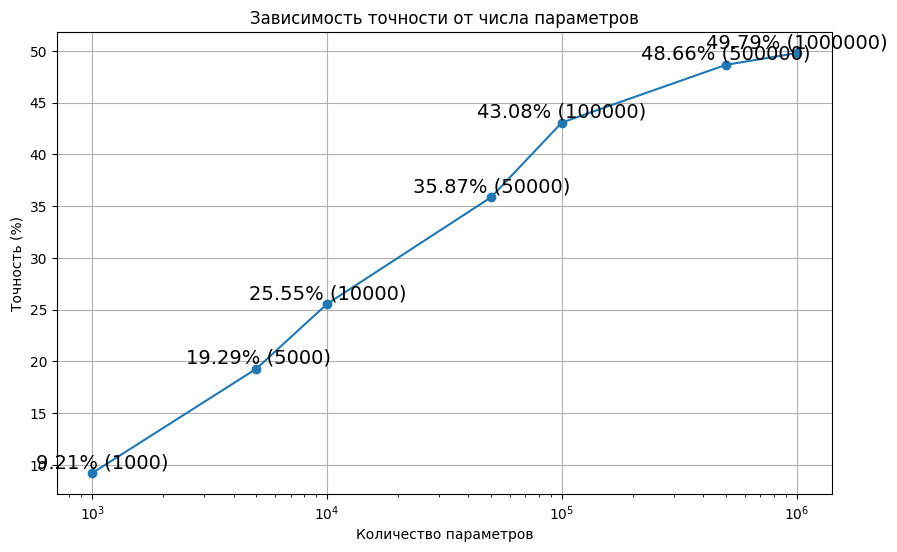

In [ ]:
import matplotlib.pyplot as plt

param_counts = [1000, 5000, 10000, 50000, 100000, 500000, 1000000]
accuracies = [9.21, 19.29, 25.55, 35.87, 43.08, 48.66, 49.79]
plt.figure(figsize=(10, 6))
plt.plot(param_counts, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('Количество параметров')
plt.ylabel('Точность (%)')
plt.title('Зависимость точности от числа параметров')
plt.grid(True)
for x, y in zip(param_counts, accuracies):
    plt.text(x + 100, y + 0.5, f'{y}% ({x})', ha='center', fontsize=14)
plt.show()

# Дообучение

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor()
])

trainset = torchvision.datasets.CIFAR100(root='/content', train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)

testset = torchvision.datasets.CIFAR100(root='/content', train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=False)

resnet = torchvision.models.resnet50(pretrained=True)

for param in resnet.parameters():
    param.requires_grad = False

num_classes = 100
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)

for param in resnet.fc.parameters():
    param.requires_grad = True

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
resnet = resnet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet.fc.parameters(), lr=1e-3)

for epoch in range(5):
    running_loss = 0.0
    resnet.train()
    for images, labels in  tqdm(trainloader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(trainloader):.4f}")

resnet.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")

100%|██████████| 3125/3125 [03:23<00:00, 15.32it/s]


Epoch 1, Loss: 2.2802


100%|██████████| 3125/3125 [03:22<00:00, 15.46it/s]


Epoch 2, Loss: 1.8461


100%|██████████| 3125/3125 [03:22<00:00, 15.46it/s]


Epoch 3, Loss: 1.7678


100%|██████████| 3125/3125 [03:22<00:00, 15.46it/s]


Epoch 4, Loss: 1.7206


100%|██████████| 3125/3125 [03:22<00:00, 15.43it/s]


Epoch 5, Loss: 1.6715
Accuracy: 57.11%


# Train

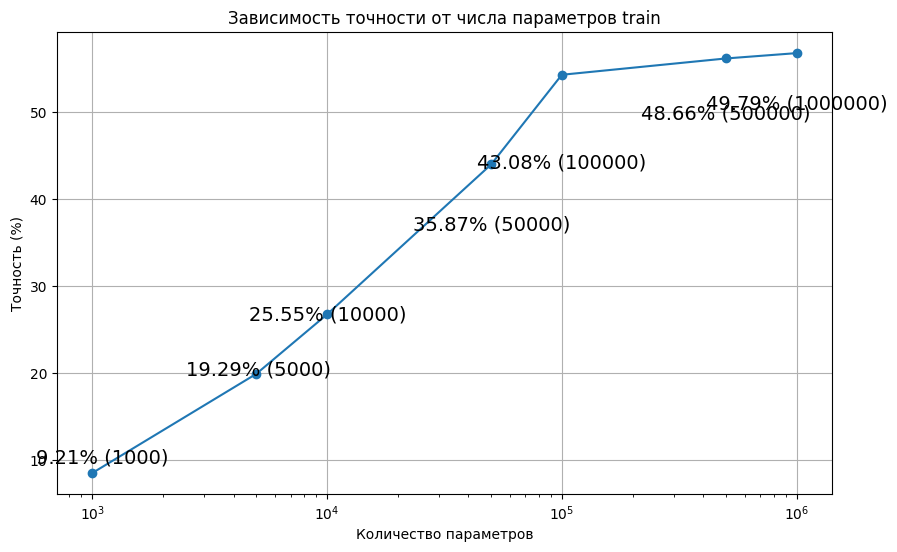

In [ ]:
import matplotlib.pyplot as plt

param_counts = [1000, 5000, 10000, 50000, 100000, 500000, 1000000]
accuracies_train = [8.542, 19.936, 26.756, 43.978, 54.27, 56.144, 56.756]
plt.figure(figsize=(10, 6))
plt.plot(param_counts, accuracies_train, marker='o')
plt.xscale('log')
plt.xlabel('Количество параметров')
plt.ylabel('Точность (%)')
plt.title('Зависимость точности от числа параметров train')
plt.grid(True)
for x, y in zip(param_counts, accuracies):
    plt.text(x + 100, y + 0.5, f'{y}% ({x})', ha='center', fontsize=14)
plt.show()